In [14]:
# Data Preprocessing Template

using DataFrames
using CSV
using Random
using MLDataUtils
using GLM

Random.seed!(0)

# Importing the dataset
df = CSV.File("Position_Salaries.csv") |> DataFrames.DataFrame!;

In [15]:
# Fitting Linear Regression to the dataset
linreg = lm(@formula(Salary ~ Level), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + Level

Coefficients:
────────────────────────────────────────────────────────────────────────────
              Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)  -195333.0    124790.0  -1.56529    0.1561  -483100.0    92433.4
Level          80878.8     20111.8   4.02147    0.0038    34501.0   127257.0
────────────────────────────────────────────────────────────────────────────

In [16]:
# Prediction a new result with Linear Regression
predict(linreg, DataFrame(Level = [ 6.5 ]))

1-element Array{Union{Missing, Float64},1}:
 330378.78787878796

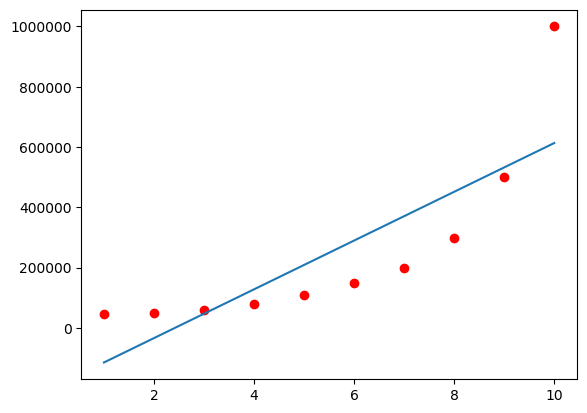

In [17]:
using PyPlot
# Visualising the Linear Regression results

scatter(df.Level, df.Salary, color = :red)
plot(df.Level, predict(linreg, DataFrame(Level = df.Level)))
show()

In [18]:
# Fitting Polynomial Regression to the dataset
linreg2 = lm(@formula(Salary ~ Level + Level^2 + Level^3 + Level^4), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Salary ~ 1 + Level + :(Level ^ 2) + :(Level ^ 3) + :(Level ^ 4)

Coefficients:
────────────────────────────────────────────────────────────────────────────────
                Estimate  Std. Error   t value  Pr(>|t|)    Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────────
(Intercept)   184167.0     67768.0     2.7176     0.0419     9963.38   358370.0
Level        -211002.0     76382.2    -2.76246    0.0397  -407349.0    -14655.7
Level ^ 2      94765.4     26454.2     3.58225    0.0158    26762.8    162768.0
Level ^ 3     -15463.3      3534.99   -4.37435    0.0072   -24550.3     -6376.31
Level ^ 4        890.152     159.803   5.5703     0.0026      479.364    1300.94
────────────────────────────────────────────────────────────────────────────────

In [19]:
# Prediction a new result with Polynomial Regression
predict(linreg2, DataFrame(Level = [ 6.5 ]))

1-element Array{Union{Missing, Float64},1}:
 158862.4526514155

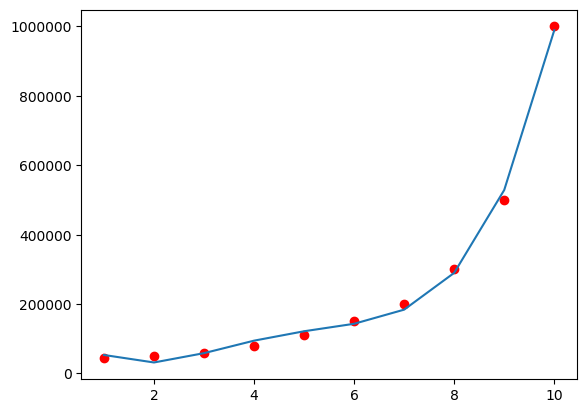

In [20]:
using PyPlot
# Visualising the Polynomial Regression results

scatter(df.Level, df.Salary, color = :red)
plot(df.Level, predict(linreg2, DataFrame(Level = df.Level)))
show()